# Download coviprev by region, regions code and columns description

In [ ]:
!wget https://static.data.gouv.fr/resources/donnees-denquete-relatives-a-levolution-des-comportements-et-de-la-sante-mentale-pendant-lepidemie-de-covid-19-coviprev/20201110-154959/coviprev-region.csv
!wget https://static.data.gouv.fr/resources/donnees-denquete-relatives-a-levolution-des-comportements-et-de-la-sante-mentale-pendant-lepidemie-de-covid-19-coviprev/20200625-125516/metadata-coviprev-libelle-region.csv
!wget https://static.data.gouv.fr/resources/donnees-denquete-relatives-a-levolution-des-comportements-et-de-la-sante-mentale-pendant-lepidemie-de-covid-19-coviprev/20200625-125516/metadata-coviprev.csv
# Download de la liste de tous les départements par régions
!wget https://static.data.gouv.fr/resources/departements-et-leurs-regions/20190815-175403/departements-region.csv

--2021-04-23 12:00:34--  https://static.data.gouv.fr/resources/donnees-denquete-relatives-a-levolution-des-comportements-et-de-la-sante-mentale-pendant-lepidemie-de-covid-19-coviprev/20201110-154959/coviprev-region.csv
Resolving static.data.gouv.fr (static.data.gouv.fr)... 37.59.183.93
Connecting to static.data.gouv.fr (static.data.gouv.fr)|37.59.183.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26769 (26K) [text/csv]
Saving to: ‘coviprev-region.csv.1’

coviprev-region.csv 100%[===================>]  26.14K  --.-KB/s    in 0.08s   

2021-04-23 12:00:34 (333 KB/s) - ‘coviprev-region.csv.1’ saved [26769/26769]

--2021-04-23 12:00:35--  https://static.data.gouv.fr/resources/donnees-denquete-relatives-a-levolution-des-comportements-et-de-la-sante-mentale-pendant-lepidemie-de-covid-19-coviprev/20200625-125516/metadata-coviprev-libelle-region.csv
Resolving static.data.gouv.fr (static.data.gouv.fr)... 37.59.183.93
Connecting to static.data.gouv.fr (static.data.g

# Load Coviprev by region
- Remove useless columns (too many nan or not in our goals)
- Convert types
- Changes values of date and region

In [ ]:
import pandas as pd

# Load coviprev by region
df = pd.read_csv('coviprev-region.csv', sep=';')

# Replace code region by name
regions = pd.read_csv('metadata-coviprev-libelle-region.csv', sep=';').set_index('Code')
df['reg'] = regions.loc[df['reg']].values


# Replace semaine by the first day of the week in datetime format
dates = ['23/03', '30/03', '14/04', '20/04', '28/04', '04/05', '13/05', '18/05', '27/05', '08/06', 
    '22/06','06/07', '20/07', '24/08', '21/09', '19/10']
mapping = {txt:date for txt,date in zip(df['semaine'].unique(), dates)}
df['semaine'] = df['semaine'].apply(lambda x: mapping[x])
df = df.rename(columns={'semaine': 'date', 'reg': 'region'})


# Remove useless columns and rows (too many nan)
df = df.drop(['dist3mes', 'dist3mes_inf', 'dist3mes_sup', 
                'nbmoy4mesHyg', 'nbmoy4mesHyg_inf', 'nbmoy4mesHyg_sup',
                'nbmoy7mes', 'nbmoy7mes_inf', 'nbmoy7mes_sup',
                'dist1m', 'dist1m_inf', 'dist1m_sup',
                'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'], axis=1)
df = df.loc[df['date'] != '23/03'].reset_index(drop=True)


# Convert columns type
string_columns = ['region', 'date']
for col in string_columns:
    df[col] = df[col].astype(str)

float_columns = [col for col in df.columns if col not in string_columns]
for col in float_columns:
    df[col] = df[col].apply(lambda x: x.replace(',', '.')).astype(float)


# Indicate on the name of the columns that this is in percentage (%)
mapping = {n: n+' (%)' for n in float_columns}
df.rename(columns=mapping, inplace=True)

df

,region,date,anxiete (%),anxiete_inf (%),anxiete_sup (%),depression (%),depression_inf (%),depression_sup (%),pbsommeil (%),pbsommeil_inf (%),pbsommeil_sup (%),hyg4mes (%),hyg4mes_inf (%),hyg4mes_sup (%),portmasque (%),portmasque_inf (%),portmasque_sup (%)
0,Île-de-France,30/03,19.4,15.6,23.9,20.6,16.7,25.1,63.5,58.4,68.4,44.9,39.7,50.1,16.2,12.7,20.5
1,Centre-Val de Loire,30/03,22.4,14.4,33.2,27.7,18.8,38.8,61.7,50.4,71.9,52.3,41.1,63.3,11.9,6.3,21.5
2,Bourgogne-Franche-Comté,30/03,17.6,10.9,27.3,17.8,11.1,27.2,55.0,44.6,65.1,55.8,45.3,65.8,21.1,13.9,30.9
3,Normandie,30/03,22.8,15.7,31.8,19.0,12.6,27.7,60.9,51.2,69.8,44.6,35.4,54.2,9.3,5.0,16.6
4,Hauts-de-France,30/03,22.6,17.2,29.1,16.4,11.8,22.3,64.9,57.8,71.4,48.0,41.0,55.1,12.5,8.5,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Bretagne,19/10,21.5,14.8,30.2,17.1,11.2,25.2,57.1,47.5,66.3,36.4,27.7,46.0,81.6,73.1,87.9
176,Nouvelle-Aquitaine,19/10,14.5,10.1,20.3,13.8,9.6,19.6,64.0,56.7,70.7,40.1,33.2,47.4,78.1,71.4,83.5
177,Occitanie,19/10,22.0,16.5,28.7,18.5,13.4,24.9,66.2,59.7,72.7,31.1,24.9,38.1,74.4,67.5,80.3
178,Auvergne-Rhône-Alpes,19/10,20.1,15.4,25.8,13.3,9.5,18.3,68.8,62.5,74.5,40.7,34.6,47.1,82.0,76.5,86.4


# Load columns description
- Remove useless columns
- Remove useless rows
- Add missing rows

In [ ]:
# Load columns descriptions
columns_description = pd.read_csv('metadata-coviprev.csv', sep=';')


# Remove descriptiosn for columns we do not use and some useless informations
values_to_drop = ['Reg', 'nbmoy4mes', 'dist3mes', 'dist3mes_inf', 'dist3mes_sup', 'nbmoy7mes', 'nbmoy7mes_inf', 'nbmoy7mes_sup', 'dist1m', 'dist1m_inf', 'dist1m_sup']
mask = columns_description['Colonne'].apply(lambda x : x not in values_to_drop)
columns_description = columns_description.loc[mask].reset_index(drop=True)
columns_description.drop(['Exemple', 'Type '], axis=1, inplace=True)
columns_description.fillna('', inplace=True)


# Add missing descriptions
lines_masque = pd.DataFrame({'Colonne': ['portmasque_inf', 'portmasque_sup'], 
                    'Description_FR': ['Formule de la borne inférieure de l\'intervalle de confiance',  'Formule de la borne supérieure de l\'intervalle de confiance'],
                    'Description_EN': ['Confidence interval lower bound formula', 'Confidence interval upper bound formula'],
                    'Precisions': ['', '']})

lines_keys = pd.DataFrame({'Colonne': ['region', 'date'],
            'Description_FR' : ['région', 'date'],
            'Description_EN': ['region', 'date'],
            'Precisions': ['', '']})

columns_description = pd.concat([lines_keys, columns_description, lines_masque]).reset_index(drop=True)


# Set Index and change name for percentage columns
columns_description = columns_description.set_index('Colonne')
mapping = {n: n+' (%)' for n in columns_description.index[2:]}
columns_description.rename(index=mapping, inplace=True)

columns_description

,Description_FR,Description_EN,Precisions
Colonne,,,
region,région,region,
date,date,date,
anxiete (%),Prévalences de l'anxiété dans le contexte de l...,Prevalence of anxiety in the context of the Co...,L’anxiété est mesurée par l’échelle HAD (Hospi...
anxiete_inf (%),Formule de la borne inférieure de l'intervalle...,Confidence interval lower bound formula,
anxiete_sup (%),Formule de la borne supérieure de l'intervalle...,Confidence interval upper bound formula,
depression (%),Prévalences de la dépression dans le contexte ...,Prevalences of depression in the context of th...,La dépression est mesurée par l’échelle HAD (H...
depression_inf (%),Formule de la borne inférieure de l'intervalle...,Confidence interval lower bound formula,
depression_sup (%),Formule de la borne supérieure de l'intervalle...,Confidence interval upper bound formula,
pbsommeil (%),Prévalences des problèmes de sommeil dans le c...,Prevalence of sleep problems in the context of...,La question posée était « Diriez-vous qu’au co...


# Plot the map

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

# On récupère les polygone pour chaque département
france = gpd.read_file("carto/departements-20140306-100m.shp")

# On convertit les code insee et on ne conserve que ceux de la france métropolitaine
# On peut alors les utiliser comme index du DF france
metropolitan_code = [str(i).zfill(2) for i in range(1, 96)]
france = france.loc[france['code_insee'].isin(metropolitan_code)]
france['code_insee'] = france['code_insee'].astype(int)
france = france.set_index('code_insee')

france.tail(10)

,nom,nuts3,wikipedia,geometry
code_insee,,,,
86,Vienne,FR534,b'fr:Vienne (d\xe9partement)',"POLYGON ((0.82849 46.17233, 0.83199 46.16931, ..."
87,Haute-Vienne,FR633,fr:Haute-Vienne,"POLYGON ((0.85969 45.61327, 0.84923 45.59327, ..."
88,Vosges,FR414,b'fr:Vosges (d\xe9partement)',"POLYGON ((5.86441 47.94605, 5.85691 47.94512, ..."
89,Yonne,FR264,b'fr:Yonne (d\xe9partement)',"POLYGON ((3.49164 47.55995, 3.48988 47.55563, ..."
90,Territoire-de-Belfort,FR434,fr:Territoire de Belfort,"POLYGON ((7.09691 47.49518, 7.07485 47.48818, ..."
91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39376 48.32678, ..."
92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31588 48.76670, ..."
93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ..."
94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41573 48.72088, ..."


In [ ]:
# On charge les données nous permettant de mapper région et code insee de départements
departements = pd.read_csv('departements-region.csv').drop('dep_name', axis=1)

# On ne conserve que ceux en france métropolitaine
departements = departements.loc[departements['num_dep'].isin(metropolitan_code)]

# On les groupes par régions
departements['num_dep'] = departements['num_dep'].apply(lambda x: [int(x)])
departements = departements.groupby('region_name').sum()

# Small fix
departements.rename(index={'Grand Est': 'Grand-Est'}, inplace=True)

departements

,num_dep
region_name,
Auvergne-Rhône-Alpes,"[1, 3, 7, 15, 26, 38, 42, 43, 63, 69, 73, 74]"
Bourgogne-Franche-Comté,"[21, 25, 39, 58, 70, 71, 89, 90]"
Bretagne,"[22, 29, 35, 56]"
Centre-Val de Loire,"[18, 28, 36, 37, 41, 45]"
Grand-Est,"[8, 10, 51, 52, 54, 55, 57, 67, 68, 88]"
Hauts-de-France,"[2, 59, 60, 62, 80]"
Normandie,"[14, 27, 50, 61, 76]"
Nouvelle-Aquitaine,"[16, 17, 19, 23, 24, 33, 40, 47, 64, 79, 86, 87]"
Occitanie,"[9, 11, 12, 30, 31, 32, 34, 46, 48, 65, 66, 81..."


In [ ]:
# On sous découpe le df pour la date 30/03 : ceci est un premier test seulement sur la date 30/03
data = df[df['date'] == '30/03'][['region', 'anxiete (%)']]

# On créé une nouvelle colonne dans notre df france pour l'anxiete retenu le 30/03
# Et on la mets à jour pour chaque département
france['anxiete_30/03'] = 0
for index, row in data.iterrows():
    anxiete = row['anxiete (%)']
    reg = row['region']
    codes = departements.loc[reg, 'num_dep']
    france.loc[codes, 'anxiete_30/03'] = anxiete

<AxesSubplot:>

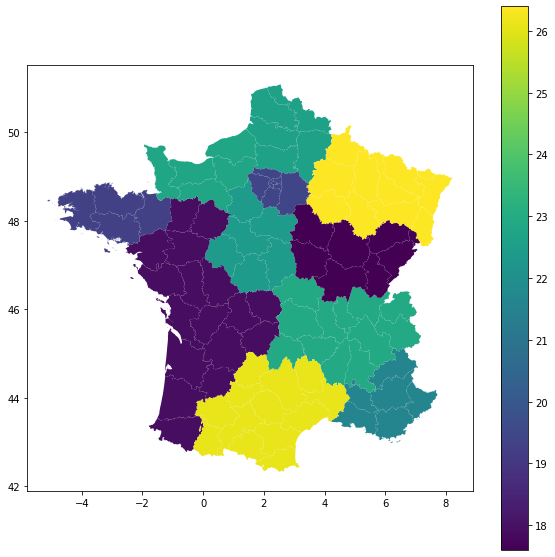

In [ ]:
import matplotlib.pyplot as plt

# Affichage 
fig, ax = plt.subplots(figsize = (10,10)) 
france.plot(column="anxiete_30/03",ax=ax, legend=True) 

## Plot version 2

@Yannis ... j'essaye de simplifier ton code pour qu'il soit plus facilement généralisable

In [ ]:
import geopandas as gpd

In [ ]:
# On récupère les polygone pour chaque département
france = gpd.read_file("carto/departements-20140306-100m.shp")

# On convertit les code insee et on ne conserve que ceux de la france métropolitaine
# On peut alors les utiliser comme index du DF france
metropolitan_code = [str(i).zfill(2) for i in range(1, 96)]
france = france.loc[france['code_insee'].isin(metropolitan_code)]
france['code_insee'] = france['code_insee'].astype(int)
france = france.set_index('code_insee').drop(['nuts3','wikipedia'], axis=1)

france.tail(10)

,nom,geometry
code_insee,,
86,Vienne,"POLYGON ((0.82849 46.17233, 0.83199 46.16931, ..."
87,Haute-Vienne,"POLYGON ((0.85969 45.61327, 0.84923 45.59327, ..."
88,Vosges,"POLYGON ((5.86441 47.94605, 5.85691 47.94512, ..."
89,Yonne,"POLYGON ((3.49164 47.55995, 3.48988 47.55563, ..."
90,Territoire-de-Belfort,"POLYGON ((7.09691 47.49518, 7.07485 47.48818, ..."
91,Essonne,"POLYGON ((2.39233 48.33593, 2.39376 48.32678, ..."
92,Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31588 48.76670, ..."
93,Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ..."
94,Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41573 48.72088, ..."


In [ ]:
## Ensuite, on ajoute les régions comme colonne
# On charge les données nous permettant de mapper région et code insee de départements
departements = pd.read_csv('departements-region.csv').drop('dep_name', axis=1)
departements.replace('Grand Est', 'Grand-Est', inplace=True)

# On ne conserve que ceux en france métropolitaine
departements = departements.loc[departements['num_dep'].isin(metropolitan_code)]
departements['num_dep'] = departements['num_dep'].astype(int) #je perds la corse dans la bataille

#-> utilisation de la fonction merge (qui fait en faite une jointure entre les tables)
france=france.merge(departements, left_on="code_insee", right_on="num_dep", how="inner")

In [ ]:
#je transforme en date ... (je sais pas si c'est le bon sens)
df['date']=pd.to_datetime(df['date'] + "/21")

<AxesSubplot:title={'center':'Problème de sommeil de 2021-03-30 à 2021-03-30'}>

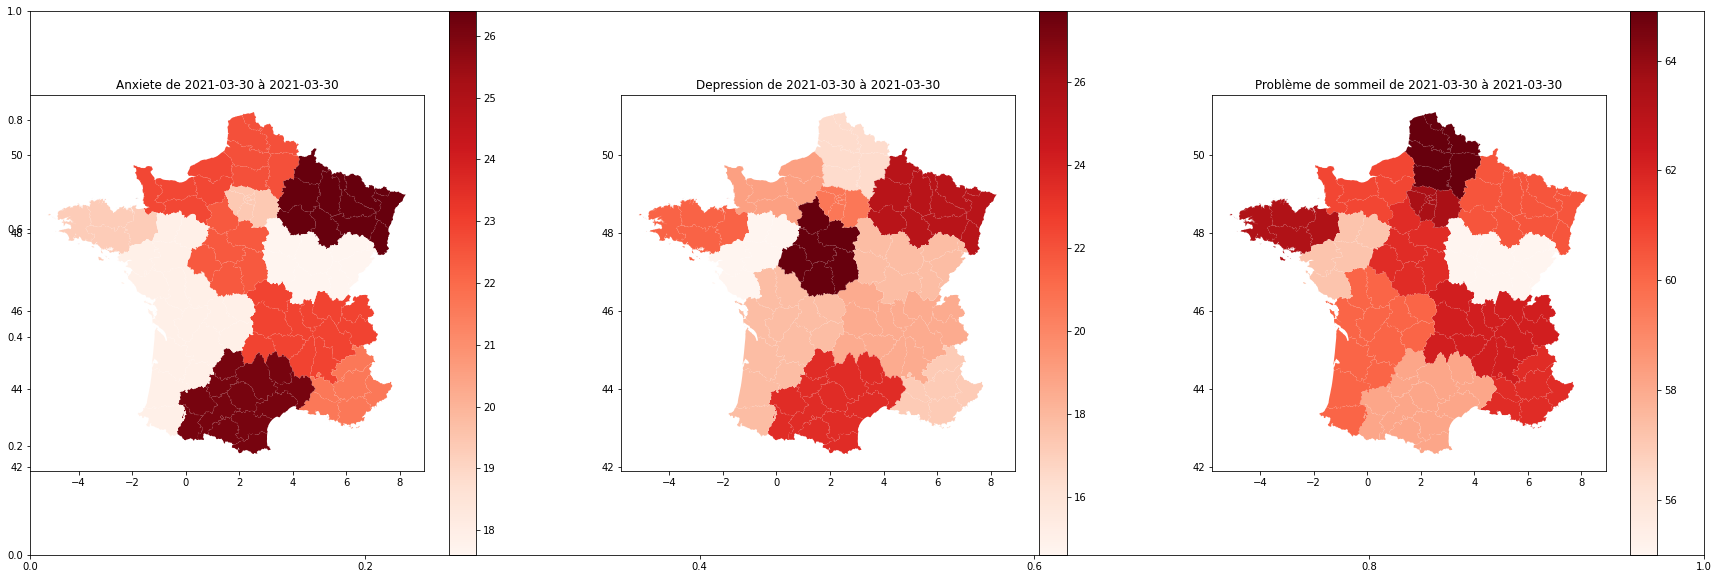

In [ ]:
# maintenant ... une cellule avec tout ce qui faut pour 1 indicateur
#on sélectionne la période
from_date="2021-03-30"
to_date="2021-03-30"

#je fais que les 3 indices liés à la depression
datatomap=df[(df.date>=from_date) & (df.date<=to_date) ].groupby(['region']).agg({"anxiete (%)":'mean', "depression (%)":'mean', "pbsommeil (%)":'mean'}).reset_index()

#on fait maintenant le lien avec la carte en utilisation le nom des régions
datatomap=france.merge(datatomap, left_on="region_name", right_on="region", how="inner")

# Affichage
fig, ax = plt.subplots(figsize = (30,10)) 
ax = fig.add_subplot(1,3,1)
plt.title(f'Anxiete de {from_date} à {to_date}')
datatomap.plot(column="anxiete (%)", ax=ax, legend=True, cmap=plt.get_cmap("Reds")) 
ax = fig.add_subplot(1,3,2)
plt.title(f'Depression de {from_date} à {to_date}')
datatomap.plot(column="depression (%)", ax=ax, legend=True, cmap=plt.get_cmap("Reds")) 
ax = fig.add_subplot(1,3,3)
plt.title(f'Problème de sommeil de {from_date} à {to_date}')
datatomap.plot(column="pbsommeil (%)", ax=ax, legend=True, cmap=plt.get_cmap("Reds")) 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=89e69a29-2e97-484d-9bb4-6946e10f2a3b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>